In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=18,6
import seaborn as sns

In [2]:
!pip install july

In [3]:
import july

# Outline

For comparing air quality in 2021, one can download the Covid-19 Air Quality Worldwide 2021 csv dataset from https://aqicn.org/data-platform/covid19/
. The dataset covers about 380 major cities in the world. And it contains daily statistics (count, median etc.) of various air quality measurement species (pm10, pm25 etc.) as well as meteorological data, updated 3 times a day.

The following code will run a quick exploratory summary and visualization based on 2021 data for any given subset of the cities.

# Read in and Get to Know the Data

In [4]:
waqi_data_2021 = pd.read_csv(# "https://aqicn.org/data-platform/covid19/report/27298-25cc14ef/2020",
                             "../input/waqi-air-quality-data-2021/waqi-covid19-airqualitydata-2020.csv",
                             header=4,
                             parse_dates=['Date'],
                             infer_datetime_format=True)

In [5]:
waqi_data_2021.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,2021-11-30,NP,Kathmandu,pm10,137,3.0,132.0,43.0,7269.49
1,2021-07-03,NP,Kathmandu,pm10,120,4.0,39.0,17.0,574.50
2,2021-07-15,NP,Kathmandu,pm10,96,7.0,27.0,13.0,279.79
3,2021-08-18,NP,Kathmandu,pm10,144,5.0,96.0,15.0,1694.25
4,2021-11-25,NP,Kathmandu,pm10,144,11.0,112.0,52.0,5377.15


In [6]:
# check for potential name variation of any given subset of cities
waqi_data_2021.loc[waqi_data_2021.City.str.lower().str.contains('jerus|london|new|shang|toky|san jo|paris|perth|tel aviv|osl|bos')]['City'].value_counts()

London         6788
Tokyo          4080
Tel Aviv       4023
Shanghai       3871
Paris          3841
Perth          3713
East London    3561
Jerusalem      3373
San Jose       3338
Newcastle      3326
Newport        3185
Boston         3100
Oslo           2672
New Delhi      2008
San José       1868
Name: City, dtype: int64

In [7]:
# drill down to preclude naming confusion
waqi_data_2021.loc[waqi_data_2021.City.str.lower().str.contains('san jo')].groupby(['Country','City'])['min'].mean()

Country  City    
CR       San José    182.549732
US       San Jose    101.044997
Name: min, dtype: float64

In [8]:
# different measuremt species of air quality
waqi_data_2021.Specie.value_counts()

temperature      186427
humidity         186340
pressure         185965
wind-speed       184101
pm25             163263
pm10             157025
no2              155892
dew              147982
o3               142611
so2              130045
co               122189
wind-gust        105333
precipitation     20975
wd                12180
aqi                4387
uvi                3209
pm1                1055
neph                648
mepaqi              322
Name: Specie, dtype: int64

# Explore & Visualize the Data

First, to see what cities have the cleanest air and etc., we provide the function below.

In [9]:
# return top n cities in the globe after sorting by some average statistic of some daily air quality measurement specie
def top_cities(n = 10, data = waqi_data_2021, statistic = 'median', measurement_specie = 'pm25'
                       , start = '2021-01-01', end = '2022-01-01', ascending = False):
    
    analysis_data = data.loc[data.Specie.isin([measurement_specie])]\
                                   .groupby(['City', 'Date'])
    
    y = analysis_data[statistic].mean().unstack('City').loc[start:end]
    
    if ascending == False:
        z = y.mean().sort_values(ascending=False).head(n)
    else:
        z = y.mean().sort_values().head(n)
    
    display(z)
    
    return z.index.values

In [10]:
z = top_cities(n = 10, data = waqi_data_2021, statistic = 'median', measurement_specie = 'pm25'
                       , start = '2021-01-01', end = '2022-01-01', ascending = True)

display(z)

City
Zürich               1.933544
Hobart              10.826498
Kamianske           12.250000
Launceston          14.330189
Nizhniy Novgorod    14.500000
Honolulu            15.822222
Vancouver           16.076433
Reykjavík           16.506173
Vitória             16.933750
Wollongong          17.523511
dtype: float64

array(['Zürich', 'Hobart', 'Kamianske', 'Launceston', 'Nizhniy Novgorod',
       'Honolulu', 'Vancouver', 'Reykjavík', 'Vitória', 'Wollongong'],
      dtype=object)

Second, a function to visualize the air quality on a calendar.

In [11]:
# plot calendar heatmap for chosen cities, statistic and measurement specie
def calendar_heatmap(data = waqi_data_2021, cities = ['Jerusalem', 'London', 'New Delhi', 'Shanghai','Tokyo', 'San Jose', 'Paris', 'Tel Aviv', 'Perth', 'Oslo', 'Boston', 'Zürich'], statistic = 'median', measurement_specie = 'pm25'
                       , start = '2021-01-01', end = '2022-01-01'):
    
    analysis_data = data.loc[data.City.str.contains('|'.join(cities))\
                                   & data.Specie.isin([measurement_specie])]\
                                   .groupby(['City', 'Date'])
    
    y = analysis_data[statistic].mean().unstack('City').loc[start:end]
    
    for city in y.columns:
        plt.figure()
        july.heatmap(y.index, y[city], title='%s DAILY %s %s'% (city, statistic.upper(), measurement_specie.upper()), cmap="golden", colorbar=True)
        plt.show()
    

<Figure size 1296x432 with 0 Axes>

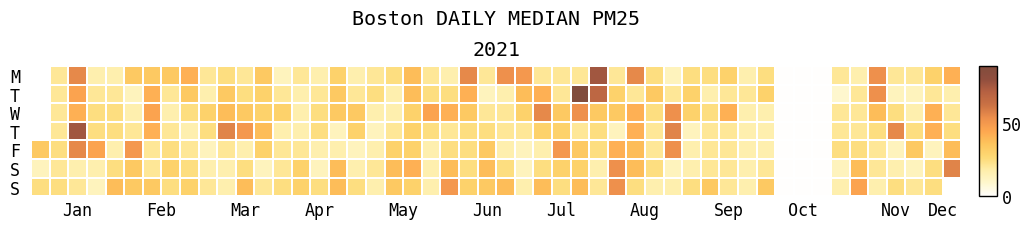

<Figure size 1800x600 with 0 Axes>

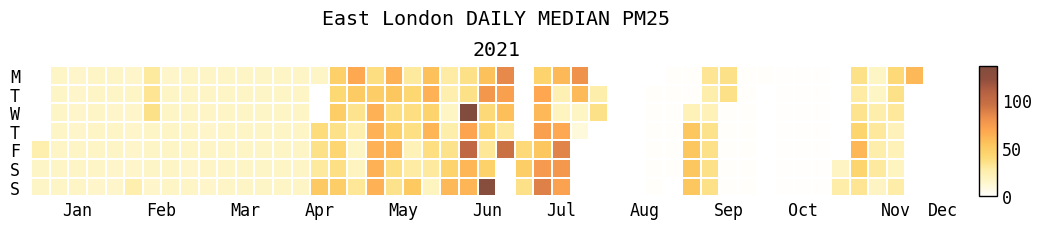

<Figure size 1800x600 with 0 Axes>

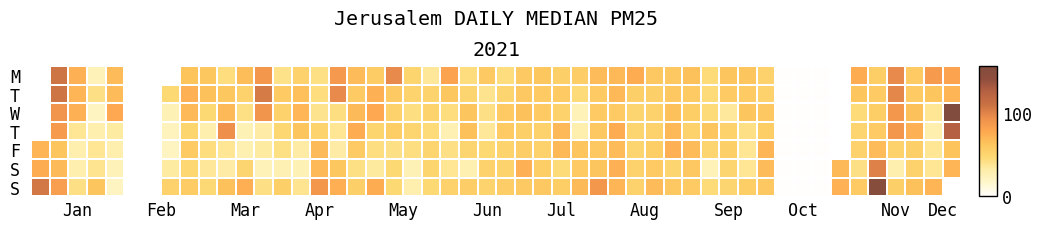

<Figure size 1800x600 with 0 Axes>

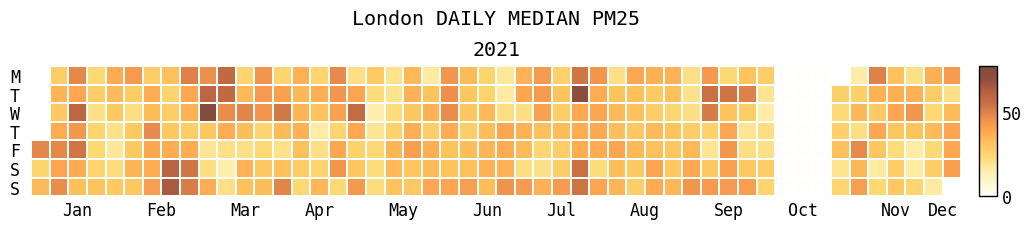

<Figure size 1800x600 with 0 Axes>

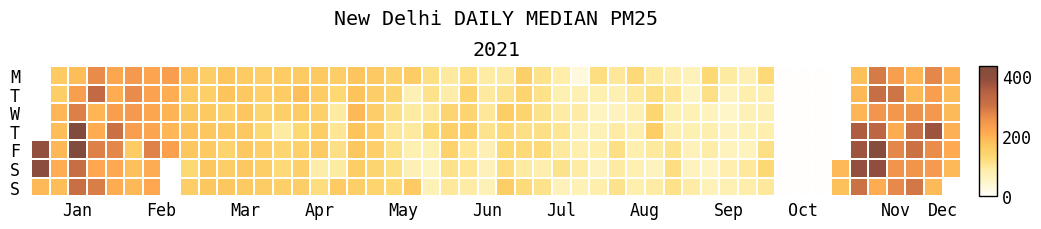

<Figure size 1800x600 with 0 Axes>

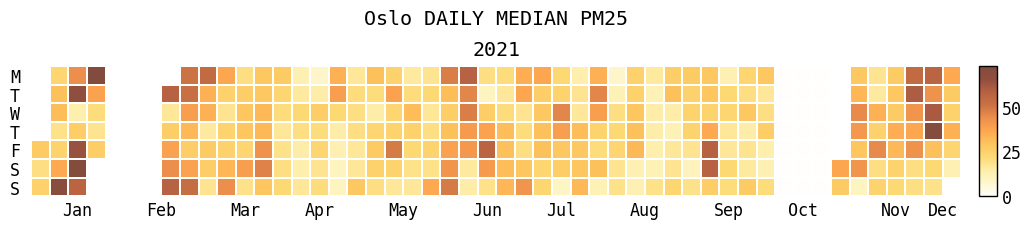

<Figure size 1800x600 with 0 Axes>

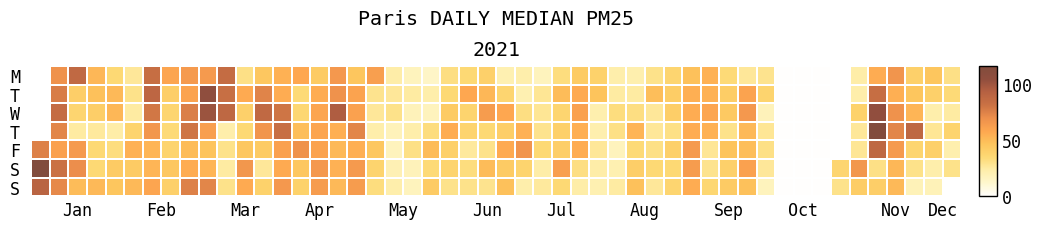

<Figure size 1800x600 with 0 Axes>

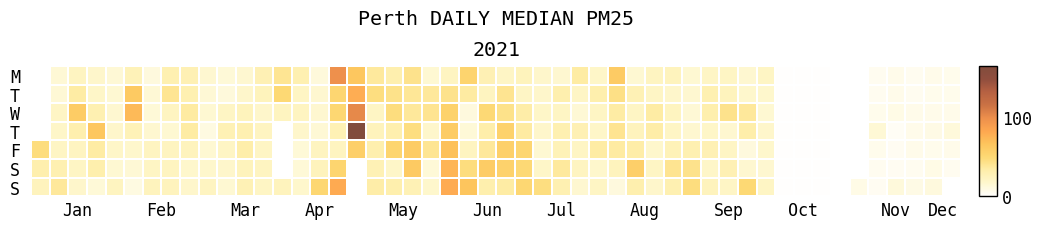

<Figure size 1800x600 with 0 Axes>

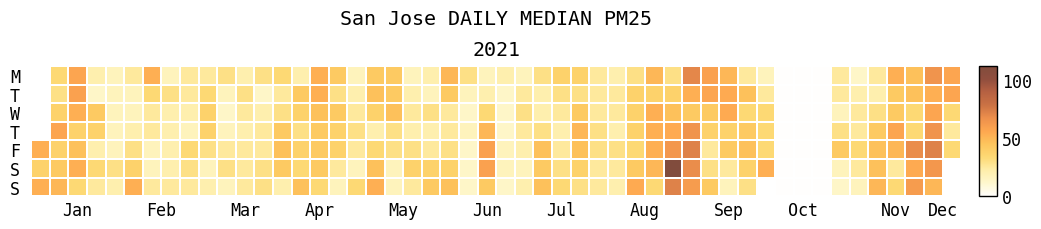

<Figure size 1800x600 with 0 Axes>

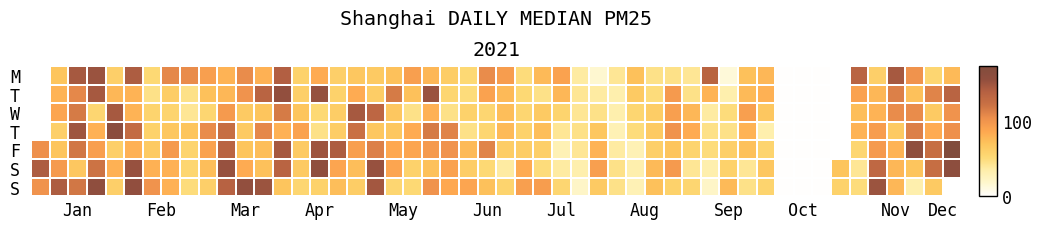

<Figure size 1800x600 with 0 Axes>

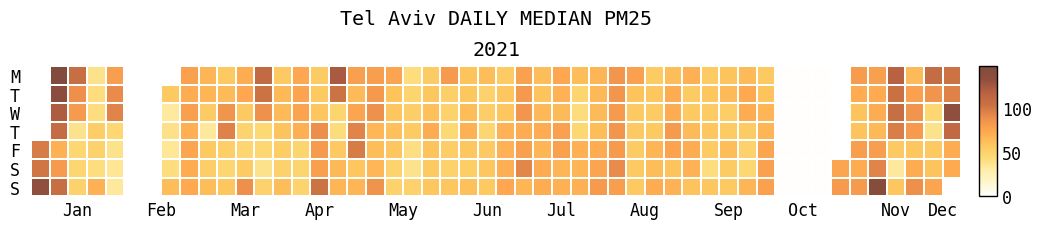

<Figure size 1800x600 with 0 Axes>

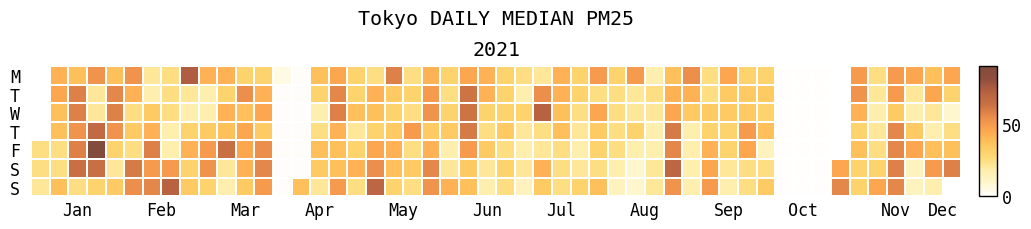

<Figure size 1800x600 with 0 Axes>

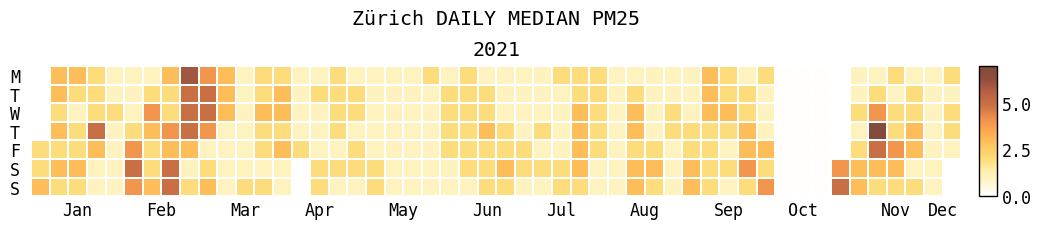

In [12]:
calendar_heatmap()

Next we will look at comparisons based on various statistics (min, max etc.) of daily PM2.5 values. But you can reset some of the function arguments below to adapt the code for broader comparisons.

To be efficent, we provide two summary functions, one for overall comparison, the other for pairwise comparison. They will print out some plots and summaries for the comparisons.

In [13]:
# overall comparison summary function
def overall_comparison_summary(data = waqi_data_2021, cities = ['Jerusalem', 'London', 'New Delhi', 'Shanghai','Tokyo', 'San Jose', 'Paris', 'Tel Aviv', 'Perth', 'Oslo', 'Boston', 'Zürich'], statistic = 'median', measurement_specie = 'pm25'
                       , start = '2021-01-01', end = '2022-01-01'):
    
    analysis_data = data.loc[data.City.str.contains('|'.join(cities))\
                                   & data.Specie.isin([measurement_specie])]\
                                   .groupby(['City', 'Date'])
    
    y = analysis_data[statistic].mean().unstack('City').loc[start:end]
    
    # average rank of cities by chosen statistic of daily measurment
    print('\nAverage rank of cities by DAILY %s %s:\n' % (statistic.upper(), measurement_specie.upper()))
    display(y.rank(axis=1).mean())
    
    # average chosen statistic of daily measurment (unweighted)
    print('\n\nAverage DAILY %s %s:\n' % (statistic.upper(), measurement_specie.upper()))
    display(y.mean())
    
    # average chosen statistic of daily measurment (weighted by daily measurement count)
    print('\n\nAverage DAILY %s %s ((weighted by daily measurement count)):\n' % (statistic.upper(), measurement_specie.upper()))
    w = analysis_data['count'].mean().unstack('City').loc[start:end]
    display((w * y).sum() / w.sum())
    
    # distribution (boxen plot) of chosen statistic of daily measurment
    print('\n\nDistribution (boxen plot) of DAILY %s %s:' % (statistic.upper(), measurement_specie.upper()))
    g = sns.catplot(data=y, kind='boxen')\
        .set_axis_labels('City', 'DAILY %s %s'% (statistic.upper(), measurement_specie.upper()))
    g.set_xticklabels(rotation=42)
    print('\n\n')
    
    # time series plot of Daily Median PM2.5
    y.plot(title='Time series of DAILY %s %s:' % (statistic.upper(), measurement_specie.upper()), ylabel='%s %s:' % (statistic.upper(), measurement_specie.upper()))
    
    return None

In [14]:
# pairwise comparison summary function
def pairwise_comparison_summary(data = waqi_data_2021, cities = ['Shanghai', 'Perth'], statistic = 'median', measurement_specie = 'pm25'
                       , start = '2021-01-01', end = '2022-01-01'):
    
    analysis_data = data.loc[data.City.str.contains('|'.join(cities))\
                                   & data.Specie.isin([measurement_specie])]\
                                   .groupby(['City', 'Date'])
    
    y = analysis_data[statistic].mean().unstack('City').loc[start:end]
    
    d = y[cities[0]] - y[cities[1]]
    
    #
    print('\nPercentage of time when DAILY %s %s in %s is greater than %s: %.2f\n' % (statistic.upper(), measurement_specie.upper(), *cities, (d>0).mean()))
    print('Percentage of time when DAILY %s %s in %s is equal %s: %.2f\n' % (statistic.upper(), measurement_specie.upper(), *cities, (d==0).mean()))
    print('Percentage of time when DAILY %s %s in %s is less than %s: %.2f\n' % (statistic.upper(), measurement_specie.upper(), *cities, (d<0).mean()))


    
    # distribution (boxen plot) of difference in chosen statistic of daily measurment
    print('\nDistribution (boxen plot) of difference in DAILY %s %s between %s and %s:' % (statistic.upper(), measurement_specie.upper(), cities[0], cities[1]))
    g = sns.catplot(data=d.to_frame(), kind='boxen')\
        .set_axis_labels('%s - %s' % (cities[0], cities[1]), 'difference in %s' % measurement_specie.upper())
    g.set_xticklabels(rotation=30)

    
    # time series plot of Daily Median PM2.5
    plt.figure()
    ax = d.plot(xlabel=' ', ylabel='difference in %s' % measurement_specie.upper(), title='difference in DAILY %s %s between %s and %s' % (statistic.upper(), measurement_specie.upper(), *cities))
    ax.axhline(y=d.mean(), xmin=-1, xmax=1, color='r', linestyle='--', lw=2)
    ax.axhline(y=0, xmin=-1, xmax=1, color='k', linestyle='-', lw=1)
    
    return None

## Daily Median PM2.5


Average rank of cities by DAILY MEDIAN PM25:



City
Boston          4.756173
East London     4.788168
Jerusalem       8.993421
London          5.984520
New Delhi      12.416404
Oslo            4.920339
Paris           7.532915
Perth           4.751634
San Jose        5.925466
Shanghai       10.437304
Tel Aviv       10.564145
Tokyo           5.957680
Zürich          1.093354
dtype: float64



Average DAILY MEDIAN PM25:



City
Boston          27.493827
East London     29.461832
Jerusalem       57.286184
London          33.631579
New Delhi      156.899054
Oslo            27.796610
Paris           45.485893
Perth           27.395425
San Jose        33.990683
Shanghai        80.636364
Tel Aviv        68.023026
Tokyo           34.244514
Zürich           1.933544
dtype: float64



Average DAILY MEDIAN PM25 ((weighted by daily measurement count)):



City
Boston          27.998832
East London     28.343585
Jerusalem       57.540451
London          33.874024
New Delhi      156.488517
Oslo            28.062959
Paris           46.506040
Perth           27.782490
San Jose        34.732486
Shanghai        80.019134
Tel Aviv        68.397981
Tokyo           34.859757
Zürich           2.199184
dtype: float64



Distribution (boxen plot) of DAILY MEDIAN PM25:





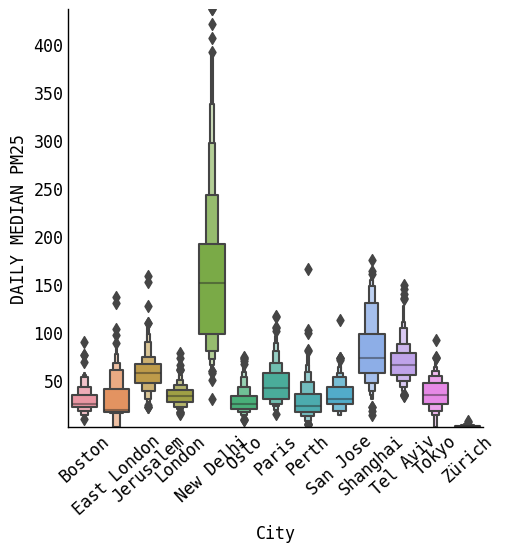

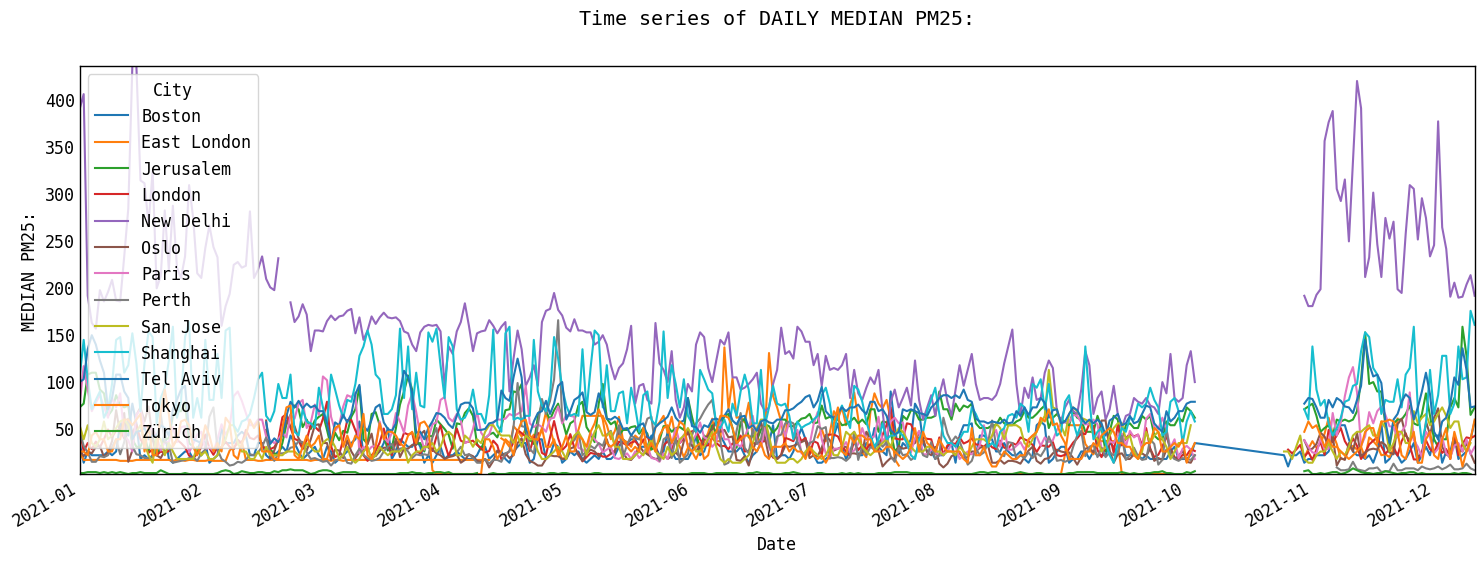

In [15]:
overall_comparison_summary()

## Daily Min PM2.5


Average rank of cities by DAILY MIN PM25:



City
Boston          6.300926
East London     8.555344
Jerusalem       8.393092
London          7.473684
New Delhi      12.444795
Oslo            2.916949
Paris           8.192790
Perth           8.401961
San Jose        6.543478
Shanghai        8.896552
Tel Aviv        5.842105
Tokyo           2.357367
Zürich          2.185127
dtype: float64



Average DAILY MIN PM25:



City
Boston           7.040123
East London     18.519084
Jerusalem       17.125000
London           9.346749
New Delhi      106.646688
Oslo             2.203390
Paris           15.915361
Perth           14.055556
San Jose         7.090062
Shanghai        23.147335
Tel Aviv         8.148026
Tokyo            1.539185
Zürich           1.259494
dtype: float64



Average DAILY MIN PM25 ((weighted by daily measurement count)):



City
Boston           6.977086
East London     18.257199
Jerusalem       16.766795
London           9.289119
New Delhi      105.995088
Oslo             2.224145
Paris           16.153153
Perth           14.221483
San Jose         7.197073
Shanghai        22.293668
Tel Aviv         8.147722
Tokyo            1.551246
Zürich           1.343537
dtype: float64



Distribution (boxen plot) of DAILY MIN PM25:





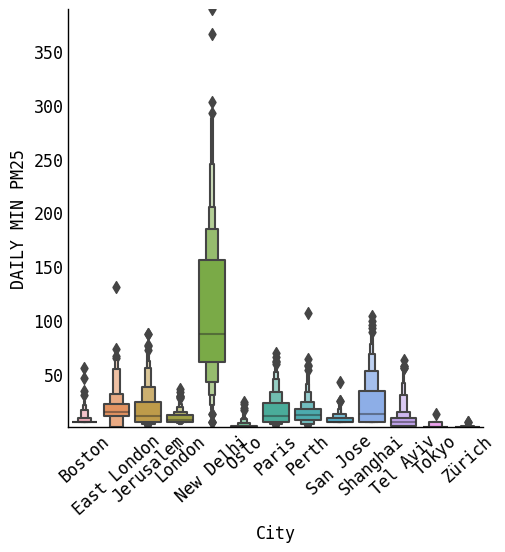

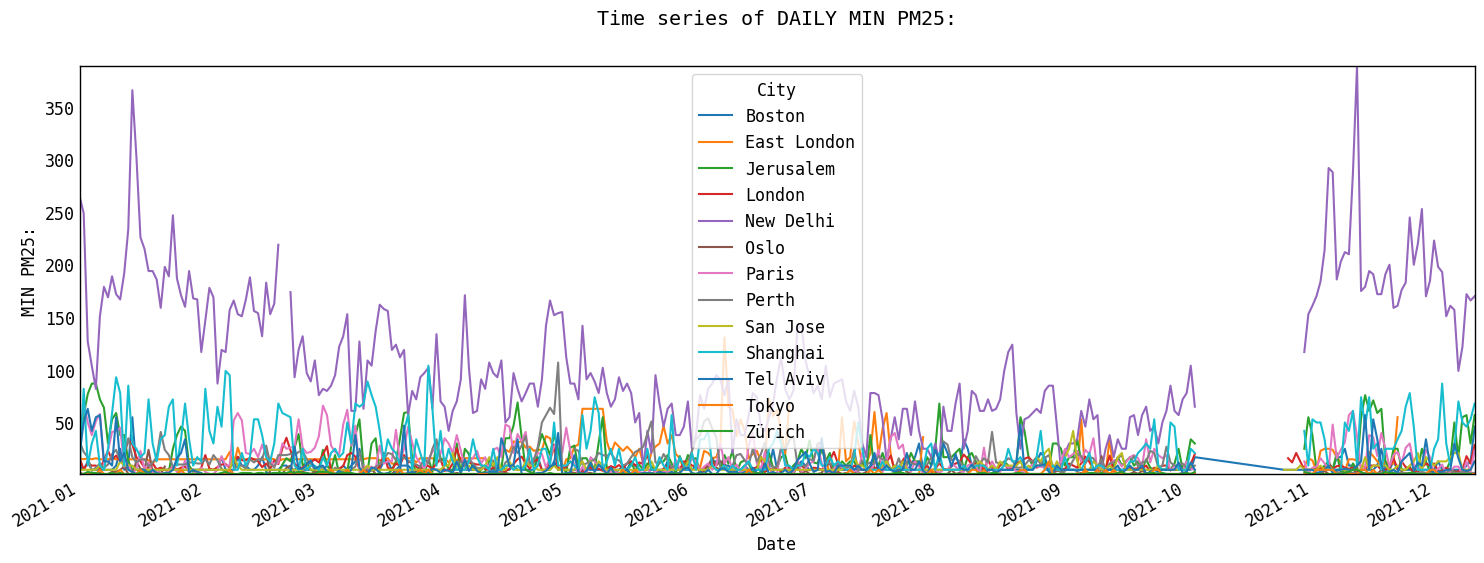

In [16]:
overall_comparison_summary(statistic='min')

## Daily Max PM2.5


Average rank of cities by DAILY MAX PM25:



City
Boston          4.245370
East London     4.811069
Jerusalem       9.123355
London          5.877709
New Delhi      11.328076
Oslo            6.544068
Paris           6.758621
Perth           3.263072
San Jose        5.152174
Shanghai       10.086207
Tel Aviv       11.190789
Tokyo           8.772727
Zürich          1.079114
dtype: float64



Average DAILY MAX PM25:



City
Boston          63.299383
East London     67.209924
Jerusalem      145.332237
London          81.634675
New Delhi      228.107256
Oslo            95.789831
Paris           92.366771
Perth           49.777778
San Jose        74.596273
Shanghai       154.307210
Tel Aviv       194.217105
Tokyo          128.667712
Zürich           3.813291
dtype: float64



Average DAILY MAX PM25 ((weighted by daily measurement count)):



City
Boston          63.874522
East London     69.211066
Jerusalem      144.394926
London          82.185159
New Delhi      227.903226
Oslo            97.487104
Paris           94.997027
Perth           50.324382
San Jose        75.436403
Shanghai       154.377568
Tel Aviv       195.545546
Tokyo          128.827275
Zürich           4.500952
dtype: float64



Distribution (boxen plot) of DAILY MAX PM25:





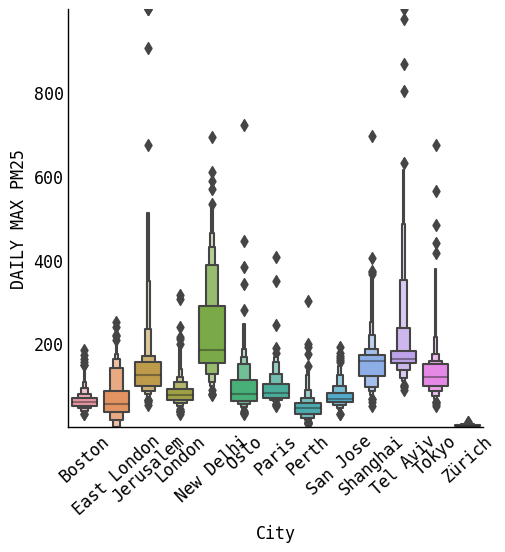

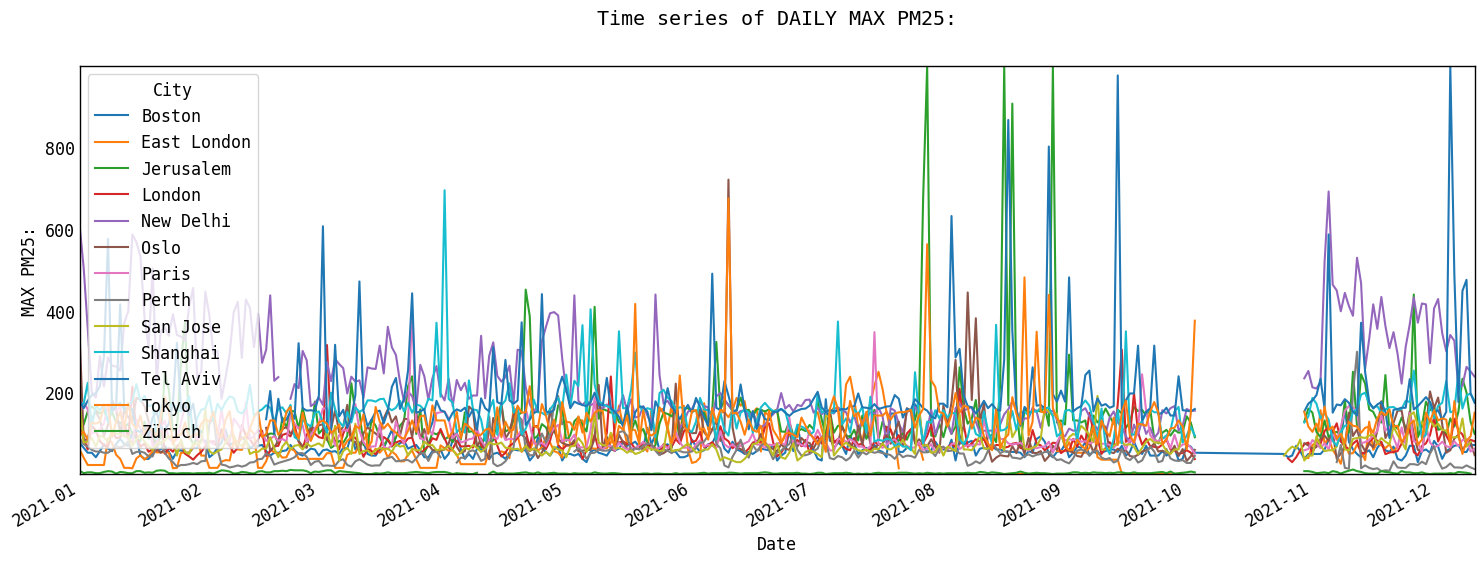

In [17]:
overall_comparison_summary(statistic='max')

## Daily Variance PM2.5


Average rank of cities by DAILY VARIANCE PM25:



City
Boston          5.015432
East London     5.759542
Jerusalem       9.753289
London          6.099071
New Delhi      10.905363
Oslo            6.677966
Paris           6.438871
Perth           3.898693
San Jose        6.559006
Shanghai        8.833856
Tel Aviv       10.898026
Tokyo           6.429467
Zürich          1.155063
dtype: float64



Average DAILY VARIANCE PM25:



City
Boston          1698.987006
East London     3658.028321
Jerusalem       9760.450329
London          2123.829892
New Delhi      16161.237666
Oslo            2792.774949
Paris           2319.166019
Perth           1528.471569
San Jose        2486.164720
Shanghai        5337.232539
Tel Aviv        6835.310888
Tokyo           2280.572978
Zürich             8.610791
dtype: float64



Average DAILY VARIANCE PM25 ((weighted by daily measurement count)):



City
Boston          1723.347992
East London     3533.534006
Jerusalem       9140.352960
London          2142.718568
New Delhi      16179.662731
Oslo            2849.807404
Paris           2393.743087
Perth           1532.407894
San Jose        2537.028845
Shanghai        5313.010247
Tel Aviv        6824.293774
Tokyo           2266.841748
Zürich            11.451544
dtype: float64



Distribution (boxen plot) of DAILY VARIANCE PM25:





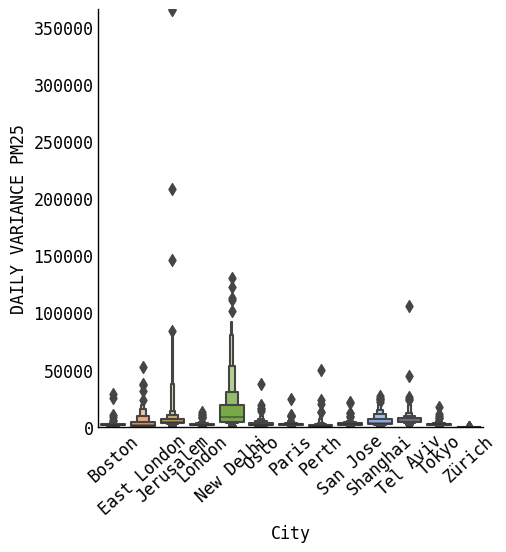

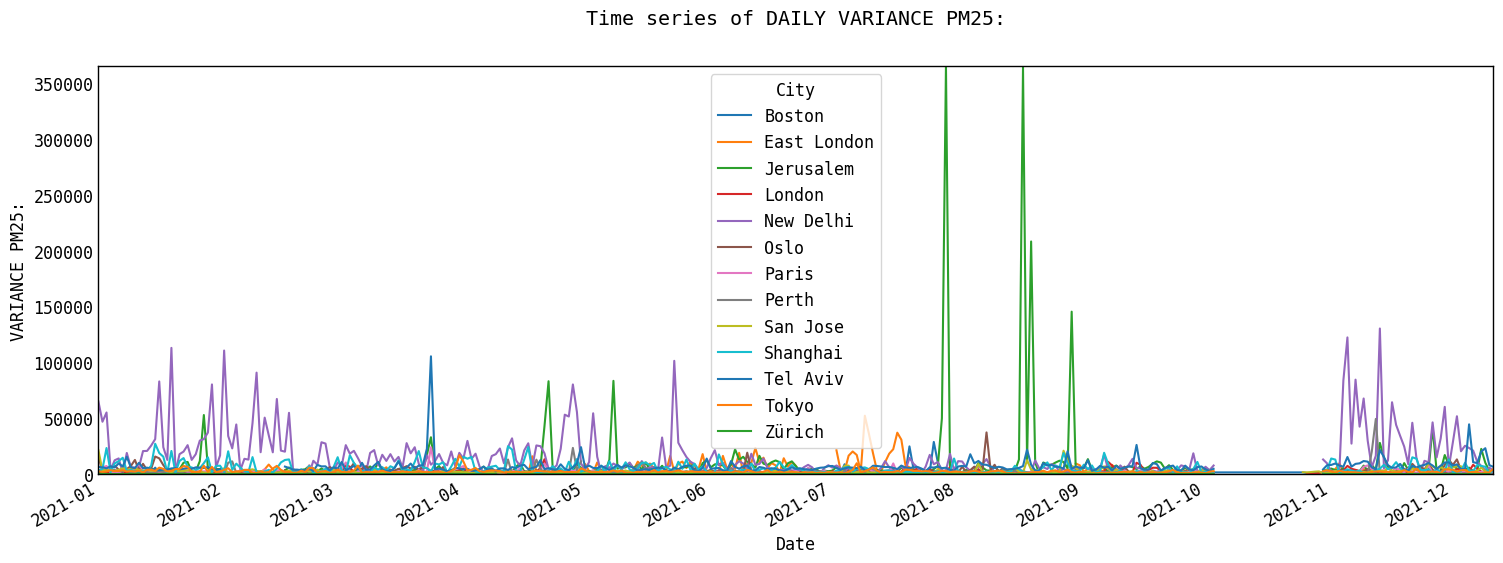

In [18]:
overall_comparison_summary(statistic='variance')

## Pairwise Comparison


Average rank of cities by DAILY MEDIAN PM25:



City
San Jose    1.482919
Tokyo       1.506270
dtype: float64



Average DAILY MEDIAN PM25:



City
San Jose    33.990683
Tokyo       34.244514
dtype: float64



Average DAILY MEDIAN PM25 ((weighted by daily measurement count)):



City
San Jose    34.732486
Tokyo       34.859757
dtype: float64



Distribution (boxen plot) of DAILY MEDIAN PM25:





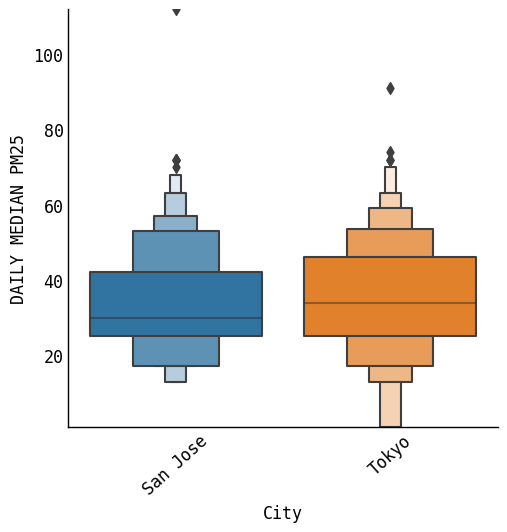

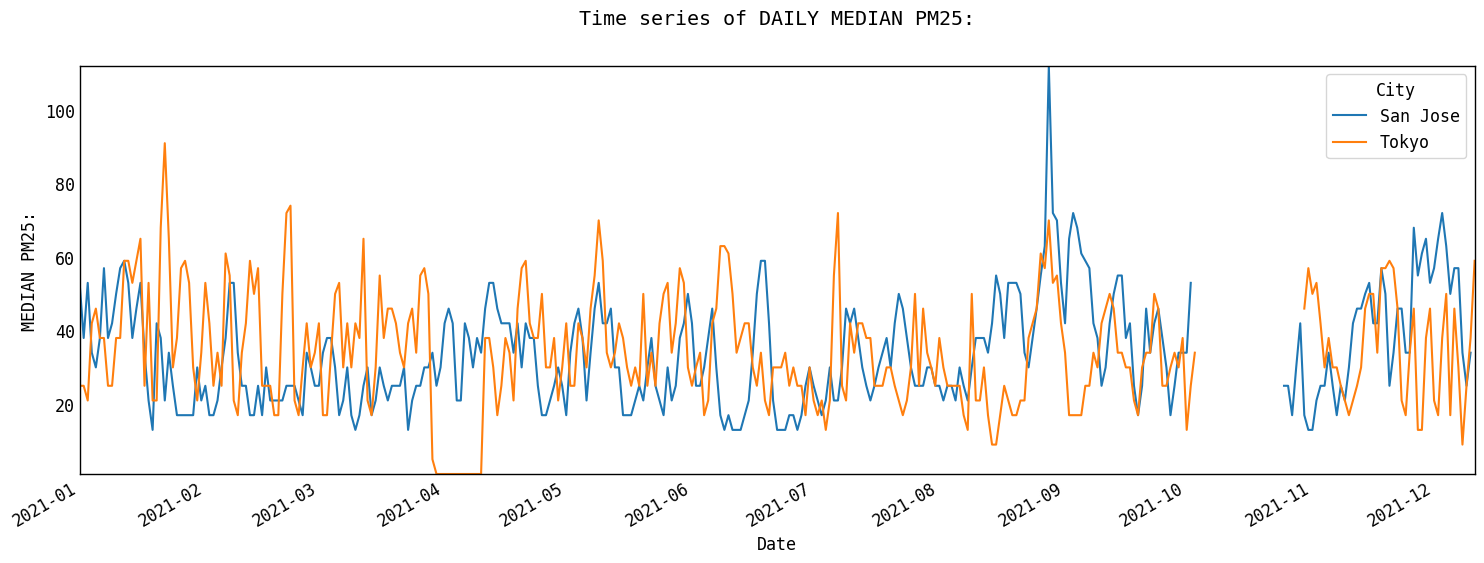

In [19]:
overall_comparison_summary(cities = ['San Jose', 'Tokyo'], statistic = 'median')

<Figure size 1800x600 with 0 Axes>

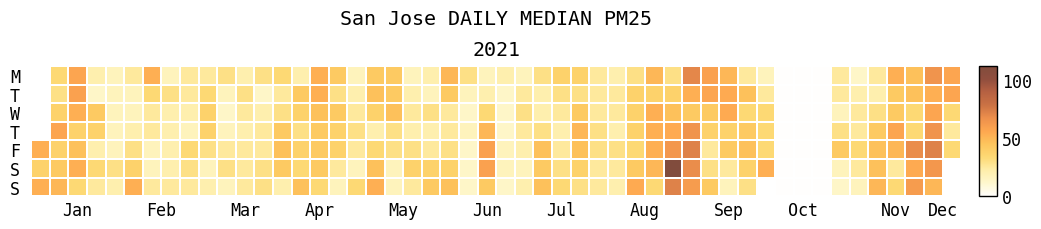

<Figure size 1800x600 with 0 Axes>

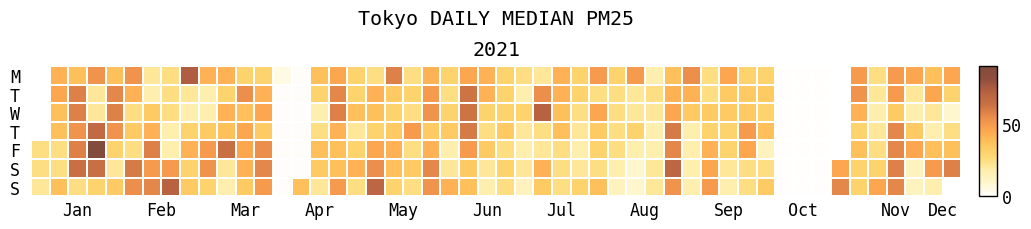

In [20]:
calendar_heatmap(cities = ['San Jose', 'Tokyo'], statistic = 'median')


Percentage of time when DAILY MEDIAN PM25 in San Jose is greater than Tokyo: 0.44

Percentage of time when DAILY MEDIAN PM25 in San Jose is equal Tokyo: 0.09

Percentage of time when DAILY MEDIAN PM25 in San Jose is less than Tokyo: 0.45


Distribution (boxen plot) of difference in DAILY MEDIAN PM25 between San Jose and Tokyo:


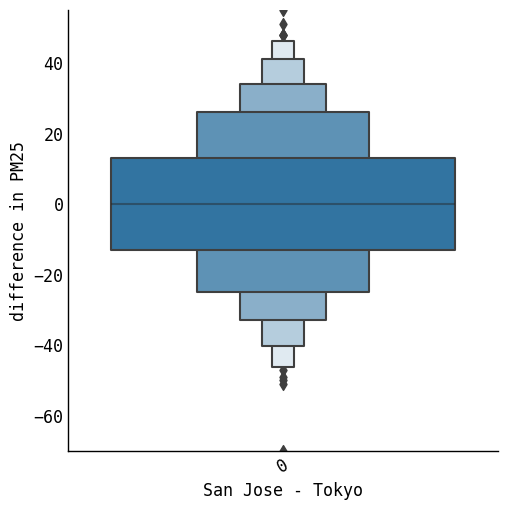

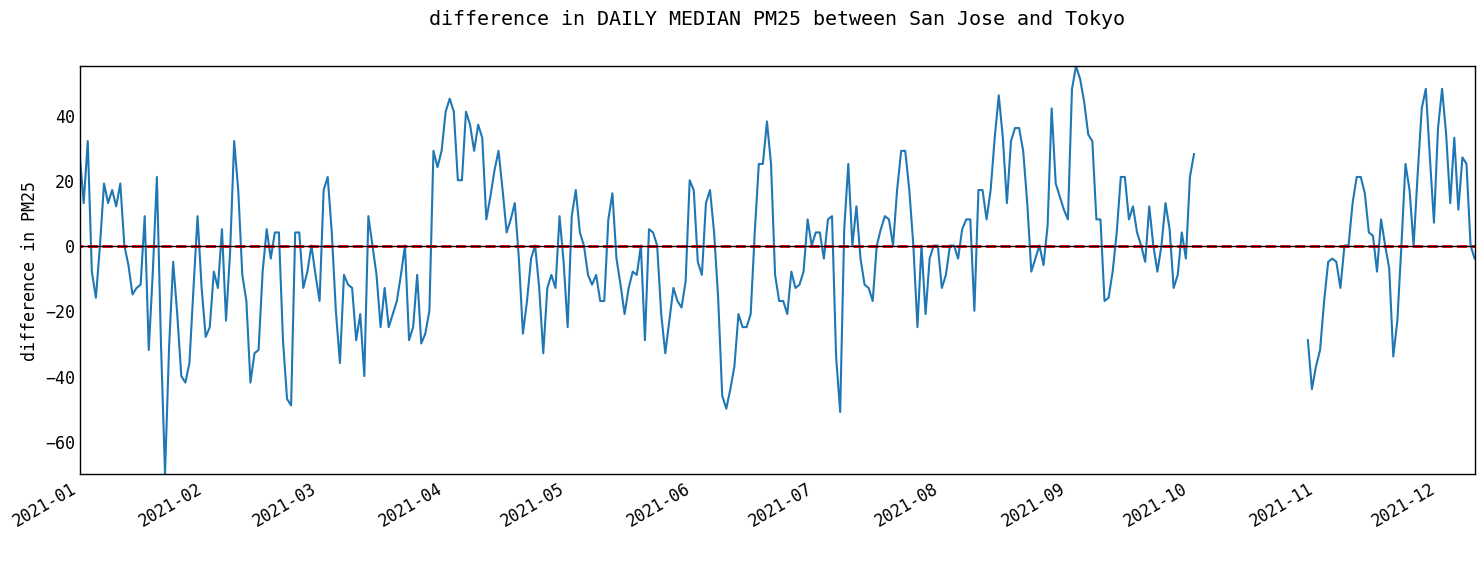

In [21]:
pairwise_comparison_summary(cities = ['San Jose', 'Tokyo'], statistic = 'median', measurement_specie = 'pm25')

# Conclusion

As shown above, the comparisons of air quality between the cities across the globe actually exibit a somewhat more complicated picture than people often thought. For example, in terms of Daily Min PM2.5, people who live in Tokyo seem to enjoy cleaner air than those in San Jose. But in terms of Daily Max PM2.5, we probably can say the opposite. So what air quality pollutant species and statistics are most important to you? And for which cities are the comparisons of most interest to you? Experiment with the data and code above and have fun.